# Odds and Addends

Think Bayes, Second Edition

Copyright 2020 Allen B. Downey

License: [Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [1]:
# If we're running on Colab, install empiricaldist
# https://pypi.org/project/empiricaldist/

import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install empiricaldist

In [2]:
# Get utils.py

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    \so\search
download('https://github.com/AllenDowney/ThinkBayes2/raw/master/soln/utils.py')

In [3]:
from utils import set_pyplot_params
set_pyplot_params()

This chapter presents a new way to represent a degree of certainty, **odds**, and a new form of Bayes's Theorem, called **Bayes's Rule**.
Bayes's Rule is convenient if you want to do a Bayesian update on paper or in your head.
It also sheds light on the important idea of **evidence** and how we can quantify the strength of evidence.

The second part of the chapter is about "addends", that is, quantities being added, and how we can compute their distributions.
We'll define functions that compute the distribution of sums, differences, products, and other operations.
Then we'll use those distributions as part of a Bayesian update.

本章提出了一种新的方法来表示一定程度的确定性、可能性和一种新形式的贝叶斯定理，称为贝叶斯规则。如果你想在纸上或在脑子里做一个贝叶斯更新，贝叶斯规则是很方便的。它还阐明了证据的重要思想以及我们如何量化证据的力量。

## Odds

One way to represent a probability is with a number between 0 and 1, but that's not the only way.
If you have ever bet on a football game or a horse race, you have probably encountered another representation of probability, called **odds**.

You might have heard expressions like "the odds are three to one", but you might not know what that means.
The **odds in favor** of an event are the ratio of the probability
it will occur to the probability that it will not.

The following function does this calculation.

表示概率的一种方法是用0到1之间的数字，但这不是唯一的方法。
如果你曾经在一场足球赛或者赛马上下过赌注，你可能会遇到另一种概率表示法，叫做赔率。


你可能听过“赔率是三比一”这样的表达，但你可能不知道这是什么意思。有利于事件发生的几率是事件发生的概率与事件不发生的概率之比。

下面的函数执行此计算。


In [1]:
def odds(p):
    return p / (1-p)

For example, if my team has a 75% chance of winning, the odds in their favor are three to one, because the chance of winning is three times the chance of losing.

例如，如果我的团队有 75% 的获胜机会，那么对他们有利的几率是三比一，因为获胜的机会是失败机会的三倍。

In [12]:
odds(0.75)

3.0

You can write odds in decimal form, but it is also common to
write them as a ratio of integers.
So "three to one" is sometimes written $3:1$.


When probabilities are low, it is more common to report the
**odds against** rather than the odds in favor.
For example, if my horse has a 10% chance of winning, the odds in favor are $1:9$.


您可以用小数形式写赔率，但也很常见
把它们写成整数的比率。
所以“三比一”有时写成 $3:1$。

当概率较低时，更常见的是报告
**赔率**而不是胜算。
例如，如果我的马有 10% 的获胜机会，那么胜出的几率是 $1:9$。


In [2]:
odds(0.1)

0.11111111111111112

But in that case it would be more common I to say that the odds against are $9:1$.


但在这种情况下，我更常说的赔率为 $9:1$。

In [3]:
odds(0.9)

9.000000000000002

Given the odds in favor, in decimal form, you can convert to probability like this:

给定支持的赔率，以十进制形式，您可以像这样转换为概率：

In [4]:
def prob(o):
    return o / (o+1)

For example, if the odds are $3/2$, the corresponding probability is $3/5$:

例如，如果赔率为 $3/2$，则对应的概率为 $3/5$：

In [5]:
prob(3/2)

0.6

Or if you represent odds with a numerator and denominator, you can convert to probability like this:

或者，如果您用分子和分母表示赔率，您可以像这样转换为概率：

In [6]:
def prob2(yes, no):
    return yes / (yes + no)

In [7]:
prob2(3, 2)

0.6

Probabilities and odds are different representations of the
same information; given either one, you can compute the other.
But some computations are easier when we work with odds, as we'll see in the next section, and some computations are even easier with log odds, which we'll see later.

概率和赔率是不同的表示
相同的信息； 给定其中一个，您可以计算另一个。
但是当我们使用赔率时，有些计算会更容易，正如我们将在下一节中看到的那样，有些计算使用对数赔率更容易，我们稍后会看到。|

## Bayes's Rule

So far we have worked with Bayes's theorem in the "probability form": 

$$P(H|D) = \frac{P(H)~P(D|H)}{P(D)}$$

Writing $\mathrm{odds}(A)$ for odds in favor of $A$, we can express Bayes's Theorem in "odds form":

$$\mathrm{odds}(A|D) = \mathrm{odds}(A)~\frac{P(D|A)}{P(D|B)}$$

This is Bayes's Rule, which says that the posterior odds are the prior odds times the likelihood ratio.
Bayes's Rule is convenient for computing a Bayesian update on paper or in your head. For example, let's go back to the cookie problem:

> Suppose there are two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. Now suppose you choose one of the bowls at random and, without looking, select a cookie at random. The cookie is vanilla. What is the probability that it came from Bowl 1?

The prior probability is 50%, so the prior odds are 1. The likelihood ratio is $\frac{3}{4} / \frac{1}{2}$, or $3/2$. So the posterior odds are $3/2$, which corresponds to probability $3/5$.


## 贝叶斯法则

到目前为止，我们已经在“概率形式”中使用了贝叶斯定理：

$$P(H|D) = \frac{P(H)~P(D|H)}{P(D)}$$

将 $\mathrm{odds}(A)$ 写成有利于 $A$ 的赔率，我们可以用“赔率形式”表达贝叶斯定理：

$$\mathrm{odds}(A|D) = \mathrm{odds}(A)~\frac{P(D|A)}{P(D|B)}$$

这就是贝叶斯法则，即后验概率是先验概率乘以似然比。
贝叶斯法则便于在纸上或头脑中计算贝叶斯更新。例如，让我们回到 cookie 问题：

> 假设有两碗饼干。碗 1 包含 30 个香草饼干和 10 个巧克力饼干。碗 2 每个包含 20 个。现在假设你随机选择一个碗，并且不看，随机选择一个饼干。饼干是香草的。它来自碗 1 的概率是多少？

先验概率为 50%，因此先验赔率为 1。似然比为 $\frac{3}{4} / \frac{1}{2}$，或 $3/2$。所以后验赔率是 $3/2$，对应于概率 $3/5$。

In [8]:
prior_odds = 1
likelihood_ratio = (3/4) / (1/2)
post_odds = prior_odds * likelihood_ratio
post_odds

1.5

In [9]:
post_prob = prob(post_odds)
post_prob

0.6

If we draw another cookie and it's chocolate, we can do another update:

如果我们绘制另一个 cookie 并且是巧克力，我们可以进行另一个更新：

In [10]:
likelihood_ratio = (1/4) / (1/2)
post_odds *= likelihood_ratio
post_odds

0.75

And convert back to probability.
并转换回概率。

In [11]:
post_prob = prob(post_odds)
post_prob

0.42857142857142855

## Oliver's Blood

I’ll use Bayes’s Rule to solve another problem from MacKay’s
[*Information Theory, Inference, and Learning Algorithms*](https://www.inference.org.uk/mackay/itila/):

> Two people have left traces of their own blood at the scene of a crime. A suspect, Oliver, is tested and found to have type ‘O’ blood. The blood groups of the two traces are found to be of type ‘O’ (a common type in the local population, having frequency 60%) and of type ‘AB’ (a rare type, with frequency 1%). Do these data \[the traces found at the scene\] give evidence in favor of the proposition that Oliver was one of the people \[who left blood at the scene\]?

To answer this question, we need to think about what it means for data
to give evidence in favor of (or against) a hypothesis. Intuitively, we might say that data favor a hypothesis if the hypothesis is more likely in light of the data than it was before.

In the cookie problem, the prior odds are 1, which corresponds to probability 50%. The posterior odds are $3/2$, or probability 60%. So the vanilla cookie is evidence in favor of Bowl 1.


## 奥利弗的血

我将使用贝叶斯法则来解决 MacKay 的另一个问题
[*信息理论、推理和学习算法*](https://www.inference.org.uk/mackay/itila/)：

> 两个人在犯罪现场留下了自己的血迹。嫌疑人奥利弗经过检测，发现其为“O”型血。发现这两个痕迹的血型为“O”型（当地人群中常见的血型，频率为 60%）和“AB”型（罕见的血型，频率为 1%）。这些数据\[在现场发现的痕迹\]是否提供了支持奥利弗是\[在现场留下血迹\]的人之一这一命题的证据？

要回答这个问题，我们需要思考它对数据的意义
提供支持（或反对）假设的证据。直观地说，如果假设根据数据比以前更有可能，我们可以说数据支持假设。

在 cookie 问题中，先验几率为 1，对应于概率 50%。后验赔率是 $3/2$，或概率 60%。所以香草饼干是支持第一碗的证据。

Bayes's Rule provides a way to make this intuition more precise. Again

$$\mathrm{odds}(A|D) = \mathrm{odds}(A)~\frac{P(D|A)}{P(D|B)}$$

Dividing through by $\mathrm{odds}(A)$, we get: 

$$\frac{\mathrm{odds}(A|D)}{\mathrm{odds}(A)} = \frac{P(D|A)}{P(D|B)}$$

The term on the left is the ratio of the posterior and prior odds. The term on the right is the likelihood ratio, also called the **Bayes
factor**.

If the Bayes factor is greater than 1, that means that the data were
more likely under $A$ than under $B$. And that means that the odds are
greater, in light of the data, than they were before.

If the Bayes factor is less than 1, that means the data were less likely under $A$ than under $B$, so the odds in favor of $A$ go down.

Finally, if the Bayes factor is exactly 1, the data are equally likely
under either hypothesis, so the odds do not change.

贝叶斯法则提供了一种使这种直觉更加精确的方法。 再次

$$\mathrm{odds}(A|D) = \mathrm{odds}(A)~\frac{P(D|A)}{P(D|B)}$$

除以 $\mathrm{odds}(A)$，我们得到：

$$\frac{\mathrm{odds}(A|D)}{\mathrm{odds}(A)} = \frac{P(D|A)}{P(D|B)}$$

左边的术语是后验概率和先验概率的比率。 右边的术语是似然比，也称为**贝叶斯
因素**。

如果贝叶斯因子大于 1，则表示数据为
低于 $A$ 的可能性比低于 $B$ 的可能性高。 这意味着几率是
根据数据，比以前更大。

如果贝叶斯因子小于 1，这意味着数据低于 $A$ 的可能性低于低于 $B$，因此支持 $A$ 的几率会下降。

最后，如果贝叶斯因子恰好为 1，则数据的可能性相同
在任一假设下，所以几率不会改变。

Let's apply that to the problem at hand. If Oliver is one of the people who left blood at the crime scene, he accounts for the ‘O’ sample; in that case, the probability of the data is the probability that a random member of the population has type ‘AB’ blood, which is 1%.

If Oliver did not leave blood at the scene, we have two samples to
account for. 
If we choose two random people from the population, what is the chance of finding one with type ‘O’ and one with type ‘AB’? 
Well, there are two ways it might happen: 

* The first person might have ‘O’ and the second ‘AB’, 

* Or the first person might have ‘AB’ and the second ‘O’.

The probability of either combination is $(0.6) (0.01)$, which is 0.6%, so the total probability is twice that, or 1.2%.
So the data are a little more likely if Oliver is *not* one of the people who left blood at the scene.

We can use these probabilities to compute the likelihood ratio:

让我们将其应用于手头的问题。 如果 Oliver 是在犯罪现场留下血迹的人之一，那么他就是“O”样本； 在这种情况下，数据的概率是人口中随机成员具有“AB”型血的概率，即 1%。

如果奥利弗没有在现场留下血迹，我们有两个样本要
占。
如果我们从人群中随机选择两个人，找到一个“O”型和一个“AB”型的机会是多少？
好吧，有两种可能发生的方式：

* 第一个人可能有“O”，第二个人可能有“AB”，

* 或者第一个人可能有“AB”，第二个人可能有“O”。

任一组合的概率为$(0.6)(0.01)$，即0.6%，所以总概率是其两倍，即1.2%。
因此，如果奥利弗*不是*在现场留下鲜血的人之一，则数据更有可能。

我们可以使用这些概率来计算似然比：

In [13]:
like1 = 0.01
like2 = 2 * 0.6 * 0.01

likelihood_ratio = like1 / like2
likelihood_ratio

0.8333333333333334

Since the likelihood ratio is less than 1, the blood tests are evidence *against* the hypothesis that Oliver left blood at the scence.

But it is weak evidence.  For example, if the prior odds were 1 (that is, 50% probability), the posterior odds would be 0.83, which corresponds to a probability of 45%:

由于似然比小于 1，血液测试是*反对*奥利弗在现场留下血液的假设的证据。

但这是微弱的证据。 例如，如果先验概率为 1（即 50% 的概率），则后验概率为 0.83，对应于 45% 的概率：

In [14]:
post_odds = 1 * like1 / like2
prob(post_odds)

0.45454545454545453

So this evidence doesn't "move the needle" very much.

This example is a little contrived, but it demonstrates the
counterintuitive result that data *consistent* with a hypothesis are
not necessarily *in favor of* the hypothesis.

If this result still bothers you, this way of thinking might help: the
data consist of a common event, type ‘O’ blood, and a rare event, type
‘AB’ blood. If Oliver accounts for the common event, that leaves the
rare event unexplained. If Oliver doesn’t account for the ‘O’ blood, we
have two chances to find someone in the population with ‘AB’ blood. And
that factor of two makes the difference.

所以这个证据并没有“动针”很多。

这个例子有点做作，但它展示了
与假设*一致*的数据是违反直觉的结果
不一定*支持*假设。

如果这个结果仍然困扰你，这种思维方式可能会有所帮助：
数据包括常见事件，“O”型血和罕见事件，类型
‘AB’血。 如果奥利弗解释了共同事件，那么
无法解释的罕见事件。 如果奥利弗不考虑“O”血，我们
有两次机会在人群中找到具有“AB”血统的人。 和
两个因素会有所不同。

**Exercise:** Suppose that based on other evidence, you prior belief in Oliver's guilt is 90%.  How much would the blood evidence in this section change your beliefs?  What if you initially thought there was only a 10% chance of his guilt?

**练习：** 假设基于其他证据，您对奥利弗有罪的先前信念是 90%。 本节中的血液证据会在多大程度上改变您的信念？ 如果你最初认为他有罪的可能性只有 10% 怎么办？

In [28]:
# Solution

post_odds = odds(0.9) * like1 / like2
# prob(post_odds)
post_odds


7.500000000000002

In [31]:
like1 = 0.01
like2 = 2 * 0.6 * 0.01
odds(0.9)* 0.01 / ( 2 * 0.6 * 0.01)

7.500000000000002

In [30]:
odds(0.9) * like1 / like2

7.500000000000002

In [32]:
prob(odds(0.9 )* (0.01 /  (2 * 0.6 * 0.01)))

0.8823529411764706

In [33]:
# Solution goes here
odds(0.1)* (like1/like2)

0.0925925925925926

## Addends

The second half of this chapter is about distributions of sums and results of other operations.
We'll start with a forward problem, where we are given the inputs and compute the distribution of the output.
Then we'll work on inverse problems, where we are given the outputs and we compute the distribution of the inputs.

As a first example, suppose you roll two dice and add them up. What is the distribution of the sum? 
I’ll use the following function to create a `Pmf` that represents the
possible outcomes of a die:

## 加数

本章的后半部分是关于其他操作的总和和结果的分布。
我们将从一个正向问题开始，给定输入并计算输出的分布。
然后我们将研究逆问题，给定输出并计算输入的分布。

作为第一个示例，假设您掷两个骰子并将它们相加。 总和的分布是什么？
我将使用以下函数创建一个代表
死亡的可能结果：

In [34]:
import numpy as np
from empiricaldist import Pmf

def make_die(sides):
    outcomes = np.arange(1, sides+1)
    die = Pmf(1/sides, outcomes)
    return die

On a six-sided die, the outcomes are 1 through 6, all
equally likely.

在六面骰子上，结果是 1 到 6，所有
同样可能。

In [35]:
die = make_die(6)

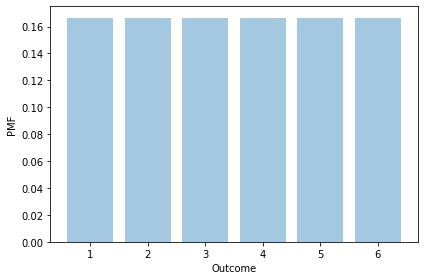

In [36]:
from utils import decorate

die.bar(alpha=0.4)
decorate(xlabel='Outcome',
         ylabel='PMF')

If we roll two dice and add them up, there are 11 possible outcomes, 2
through 12, but they are not equally likely. To compute the distribution
of the sum, we have to enumerate the possible outcomes. 

And that's how this function works:

如果我们掷两个骰子并将它们相加，有 11 种可能的结果，2
到 12 岁，但它们的可能性并不相同。 计算分布
在总和中，我们必须列举可能的结果。

这就是这个函数的工作原理：

In [37]:
def add_dist(pmf1, pmf2):
    """Compute the distribution of a sum."""
    res = Pmf()
    for q1, p1 in pmf1.items():
        for q2, p2 in pmf2.items():
            q = q1 + q2
            p = p1 * p2
            res[q] = res(q) + p
    return res

The parameters are `Pmf` objects representing distributions.

The loops iterate though the quantities and probabilities in the `Pmf` objects.
Each time through the loop `q` gets the sum of a pair of quantities, and `p` gets the probability of the pair.
Because the same sum might appear more than once, we have to add up the total probability for each sum.

Notice a subtle element of this line:

```
            res[q] = res(q) + p
```

I use parentheses on the right side of the assignment, which returns 0 if `q` does not appear yet in `res`.
I use brackets on the left side of the assignment to create or update an element in `res`; using parentheses on the left side would not work.

`Pmf` provides `add_dist`, which does the same thing.
You can call it as a method, like this:

注意这一行的一个微妙元素：

```
             res[q] = res(q) + p
```

我在赋值右侧使用括号，如果 `q` 尚未出现在 `res` 中，则返回 0。
我使用赋值左侧的括号来创建或更新 `res` 中的元素； 在左侧使用括号是行不通的。

`Pmf` 提供了 `add_dist`，它做同样的事情。
您可以将其作为方法调用，如下所示：

In [38]:
twice = die.add_dist(die)

Or as a function, like this:

In [39]:
twice = Pmf.add_dist(die, die)

And here's what the result looks like:

In [40]:
from utils import decorate

def decorate_dice(title=''):
    decorate(xlabel='Outcome',
             ylabel='PMF',
             title=title)

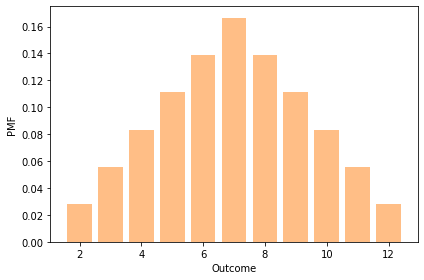

In [41]:
twice = add_dist(die, die)
twice.bar(color='C1', alpha=0.5)
decorate_dice()

If we have a sequence of `Pmf` objects that represent dice, we can compute the distribution of the sum like this:
如果我们有一系列代表骰子的“Pmf”对象，我们可以像这样计算总和的分布：


In [42]:
def add_dist_seq(seq):
    """Compute Pmf of the sum of values from seq."""
    total = seq[0]
    for other in seq[1:]:
        total = total.add_dist(other)
    return total

As an example, we can make a list of three dice like this:
例如，我们可以像这样列出三个骰子：

In [43]:
dice = [die] * 3

And we can compute the distribution of their sum like this.
我们可以像这样计算它们总和的分布。

In [44]:
thrice = add_dist_seq(dice)

The following figure shows what these three distributions look like:

-   The distribution of a single die is uniform from 1 to 6.

-   The sum of two dice has a triangle distribution between 2 and 12.

-   The sum of three dice has a bell-shaped distribution between 3
    and 18.

    下图显示了这三个分布的样子：

- 单个模具的分布从 1 到 6 是均匀的。

- 两个骰子的总和具有 2 到 12 之间的三角形分布。

- 三个骰子的总和在 3 之间呈钟形分布
     和 18。

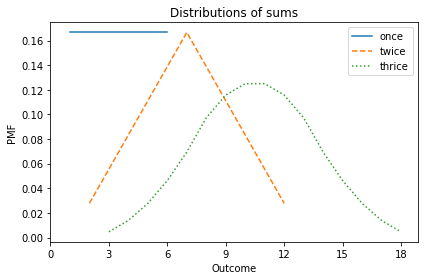

In [45]:
import matplotlib.pyplot as plt

die.plot(label='once')
twice.plot(label='twice', ls='--')
thrice.plot(label='thrice', ls=':')

plt.xticks([0,3,6,9,12,15,18])
decorate_dice(title='Distributions of sums')

As an aside, this example demonstrates the Central Limit Theorem, which says that the distribution of a sum converges on a bell-shaped normal distribution, at least under some conditions.

顺便说一句，这个例子演示了中心极限定理，它表示和的分布收敛于钟形正态分布，至少在某些条件下是这样。

## Gluten Sensitivity

In 2015 I read a paper that tested whether people diagnosed with gluten sensitivity (but not celiac disease) were able to distinguish gluten flour from non-gluten flour in a blind challenge
([you can read the paper here](https://onlinelibrary.wiley.com/doi/full/10.1111/apt.13372)).

Out of 35 subjects, 12 correctly identified the gluten flour based on
resumption of symptoms while they were eating it. Another 17 wrongly
identified the gluten-free flour based on their symptoms, and 6 were
unable to distinguish.

The authors conclude, "Double-blind gluten challenge induces symptom
recurrence in just one-third of patients."

This conclusion seems odd to me, because if none of the patients were
sensitive to gluten, we would expect some of them to identify the gluten flour by chance. 
So here's the question: based on this data, how many of the subjects are sensitive to gluten and how many are guessing?

We can use Bayes's Theorem to answer this question, but first we have to make some modeling decisions. I'll assume:

-   People who are sensitive to gluten have a 95% chance of correctly
    identifying gluten flour under the challenge conditions, and

-   People who are not sensitive have a 40% chance of identifying the
    gluten flour by chance (and a 60% chance of either choosing the
    other flour or failing to distinguish).

These particular values are arbitrary, but the results are not sensitive to these choices.

I will solve this problem in two steps. First, assuming that we know how many subjects are sensitive, I will compute the distribution of the data. 
Then, using the likelihood of the data, I will compute the posterior distribution of the number of sensitive patients.

The first is the **forward problem**; the second is the **inverse
problem**.

## 麸质敏感性

2015 年，我阅读了一篇论文，该论文测试了被诊断患有麸质敏感性（但不是乳糜泻）的人是否能够在盲测中区分麸质面粉和非麸质面粉
（[你可以在这里阅读论文]（https://onlinelibrary.wiley.com/doi/full/10.1111/apt.13372））。

在 35 名受试者中，有 12 名根据
在他们吃东西时恢复症状。另外17个错误
根据症状鉴定出无麸质面粉，其中 6
无法区分。

作者总结说：“双盲面筋挑战会诱发症状
只有三分之一的患者复发。”

这个结论对我来说似乎很奇怪，因为如果没有一个病人是
对面筋敏感，我们希望他们中的一些人偶然识别出面筋面粉。
那么问题来了：根据这些数据，有多少受试者对麸质敏感，又有多少人在猜测？

我们可以使用贝叶斯定理来回答这个问题，但首先我们必须做出一些建模决策。我会假设：

- 对麸质敏感的人有 95% 的机会正确
    在挑战条件下识别面筋粉，以及

- 不敏感的人有 40% 的机会识别
    面筋面粉是偶然的（并且有 60% 的机会选择
    其他面粉或未能区分）。

这些特定值是任意的，但结果对这些选择不敏感。

我将分两步解决这个问题。首先，假设我们知道有多少对象是敏感的，我将计算数据的分布。
然后，使用数据的可能性，我将计算敏感患者数量的后验分布。

首先是**前向问题**；第二个是**逆
问题**。

## The Forward Problem

Suppose we know that 10 of the 35 subjects are sensitive to gluten. That
means that 25 are not:

## 正向问题

假设我们知道 35 名受试者中有 10 名对麸质敏感。 那
意味着 25 名不是：

In [46]:
n = 35
num_sensitive = 10
num_insensitive = n - num_sensitive

Each sensitive subject has a 95% chance of identifying the gluten flour,
so the number of correct identifications follows a binomial distribution.

I'll use `make_binomial`, which we defined in <<_TheBinomialDistribution>>, to make a `Pmf` that represents the binomial distribution.

每个敏感对象有 95% 的机会识别出面筋粉，
所以正确识别的数量服从二项分布。

我将使用我们在 <<_TheBinomialDistribution>> 中定义的 `make_binomial` 来制作代表二项式分布的 `Pmf`。

In [47]:
from utils import make_binomial

dist_sensitive = make_binomial(num_sensitive, 0.95)
dist_insensitive = make_binomial(num_insensitive, 0.40)

The results are the distributions for the number of correct identifications in each group.

Now we can use `add_dist` to compute the distribution of the total number of correct identifications:

结果是每组中正确识别数量的分布。

现在我们可以使用`add_dist`来计算正确识别总数的分布：

In [49]:
dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive)

Here are the results:
结果如下：

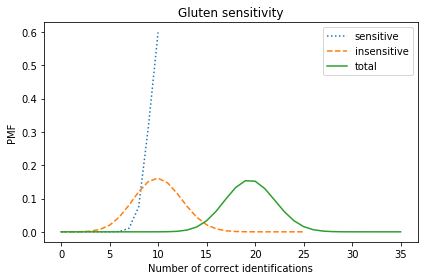

In [50]:
dist_sensitive.plot(label='sensitive', ls=':')
dist_insensitive.plot(label='insensitive', ls='--')
dist_total.plot(label='total')

decorate(xlabel='Number of correct identifications',
         ylabel='PMF',
         title='Gluten sensitivity')

We expect most of the sensitive subjects to identify the gluten flour correctly.
Of the 25 insensitive subjects, we expect about 10 to identify the gluten flour by chance.
So we expect about 20 correct identifications in total.

This is the answer to the forward problem: given the number of sensitive subjects, we can compute the distribution of the data.】

我们希望大多数敏感对象能够正确识别面筋粉。
在 25 名不敏感的受试者中，我们预计约有 10 名偶然识别出面筋粉。
所以我们预计总共有大约 20 个正确的识别。

这是前向问题的答案：给定敏感对象的数量，我们可以计算数据的分布。

## The Inverse Problem

Now let's solve the inverse problem: given the data, we'll compute the posterior distribution of the number of sensitive subjects.

Here's how.  I'll loop through the possible values of `num_sensitive` and compute the distribution of the data for each:

## 逆问题

现在让我们解决逆问题：给定数据，我们将计算敏感对象数量的后验分布。

就是这样。 我将遍历 `num_sensitive` 的可能值并计算每个值的数据分布：

In [51]:
import pandas as pd

table = pd.DataFrame()
for num_sensitive in range(0, n+1):
    num_insensitive = n - num_sensitive
    dist_sensitive = make_binomial(num_sensitive, 0.95)
    dist_insensitive = make_binomial(num_insensitive, 0.4)
    dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive)    
    table[num_sensitive] = dist_total

The loop enumerates the possible values of `num_sensitive`.
For each value, it computes the distribution of the total number of correct identifications, and stores the result as a column in a Pandas `DataFrame`.

循环枚举 `num_sensitive` 的可能值。
对于每个值，它计算正确识别总数的分布，并将结果作为列存储在 Pandas `DataFrame` 中。

In [52]:
table.head(3)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.719071e-08,1.432559e-09,1.193799e-10,9.948326e-12,8.290272e-13,6.908560e-14,5.757133e-15,4.797611e-16,3.998009e-17,3.331674e-18,...,1.501694e-36,1.251411e-37,1.042843e-38,8.690357e-40,7.241964e-41,6.034970e-42,5.029142e-43,4.190952e-44,3.492460e-45,2.910383e-46
1,4.011165e-07,5.968996e-08,7.162795e-09,7.792856e-10,8.013930e-11,7.944844e-12,7.676178e-13,7.276377e-14,6.796616e-15,6.274653e-16,...,7.508469e-34,6.486483e-35,5.596590e-36,4.823148e-37,4.152060e-38,3.570691e-39,3.067777e-40,2.633315e-41,2.258457e-42,1.935405e-43
2,4.545987e-06,9.741401e-07,1.709122e-07,2.506426e-08,3.269131e-09,3.940182e-10,4.490244e-11,4.908756e-12,5.197412e-13,5.365476e-14,...,1.806613e-31,1.620070e-32,1.449030e-33,1.292922e-34,1.151034e-35,1.022555e-36,9.066202e-38,8.023344e-39,7.088005e-40,6.251357e-41


The following figure shows selected columns from the `DataFrame`, corresponding to different hypothetical values of `num_sensitive`:

下图显示了从 `DataFrame` 中选择的列，对应于 `num_sensitive` 的不同假设值：

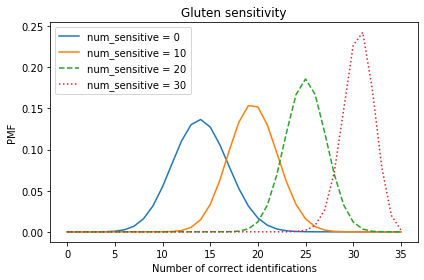

In [54]:
table[0].plot(label='num_sensitive = 0')
table[10].plot(label='num_sensitive = 10')
table[20].plot(label='num_sensitive = 20', ls='--')
table[30].plot(label='num_sensitive = 30', ls=':')
    
decorate(xlabel='Number of correct identifications',
         ylabel='PMF',
         title='Gluten sensitivity')

Now we can use this table to compute the likelihood of the data:

现在我们可以使用这个表来计算数据的可能性：

In [55]:
likelihood1 = table.loc[12]

`loc` selects a row from the `DataFrame`.
The row with index 12 contains the probability of 12 correct identifications for each hypothetical value of `num_sensitive`.
And that's exactly the likelihood we need to do a Bayesian update.

I'll use a uniform prior, which implies that I would be equally surprised by any value of `num_sensitive`:

`loc` 从 `DataFrame` 中选择一行。
索引为 12 的行包含 `num_sensitive` 的每个假设值的 12 次正确识别的概率。
这正是我们需要进行贝叶斯更新的可能性。

我将使用统一的先验，这意味着我会对 `num_sensitive` 的任何值同样感到惊讶：

In [56]:
hypos = np.arange(n+1)
prior = Pmf(1, hypos)

And here's the update:


In [63]:
posterior1 = prior * likelihood1
posterior1.normalize()

0.4754741648615132

For comparison, I also compute the posterior for another possible outcome, 20 correct identifications.

为了比较，我还计算了另一个可能结果的后验，即 20 个正确识别。

In [64]:
likelihood2 = table.loc[20]
posterior2 = prior * likelihood2
posterior2.normalize()

1.7818649765887375

The following figure shows posterior distributions of `num_sensitive` based on the actual data, 12 correct identifications, and the other possible outcome, 20 correct identifications.

下图显示了基于实际数据的 num_sensitive 的后验分布，12 个正确识别，以及其他可能的结果，20 个正确识别。

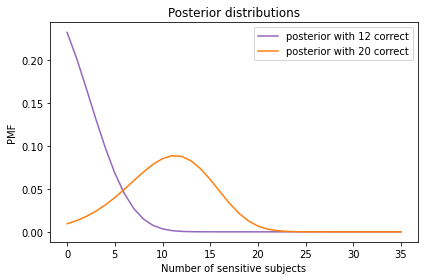

In [65]:
posterior1.plot(label='posterior with 12 correct', color='C4')
posterior2.plot(label='posterior with 20 correct', color='C1')

decorate(xlabel='Number of sensitive subjects',
         ylabel='PMF',
         title='Posterior distributions')

With 12 correct identifications, the most likely conclusion is that none of the subjects are sensitive to gluten.
If there had been 20 correct identifications, the most likely conclusion would be that 11-12 of the subjects were sensitive.

有 12 个正确的识别，最有可能的结论是没有一个受试者对麸质敏感。
如果有 20 个正确的识别，最可能的结论是 11-12 个受试者是敏感的。

In [61]:
posterior1.max_prob()

0

In [62]:
posterior2.max_prob()

11

## Summary

This chapter presents two topics that are almost unrelated except that they make the title of the chapter catchy.

The first part of the chapter is about Bayes's Rule, evidence, and how we can quantify the strength of evidence using a likelihood ratio or Bayes factor.

The second part is about `add_dist`, which computes the distribution of a sum.
We can use this function to solve forward and inverse problems; that is, given the parameters of a system, we can compute the distribution of the data or, given the data, we can compute the distribution of the parameters.

In the next chapter, we'll compute distributions for minimums and maximums, and use them to solve more Bayesian problems.
But first you might want to work on these exercises.

## 概括

本章介绍了两个几乎不相关的主题，只是它们使本章的标题很吸引人。

本章的第一部分是关于贝叶斯法则、证据，以及我们如何使用似然比或贝叶斯因子来量化证据的强度。

第二部分是关于 `add_dist`，它计算总和的分布。
我们可以使用这个函数来解决正向和逆向问题；也就是说，给定系统的参数，我们可以计算数据的分布，或者，给定数据，我们可以计算参数的分布。

在下一章中，我们将计算最小值和最大值的分布，并使用它们来解决更多的贝叶斯问题。
但首先你可能想要做这些练习。

## Exercises

**Exercise:** Let's use Bayes's Rule to solve the Elvis problem from <<_Distributions>>:

> Elvis Presley had a twin brother who died at birth. What is the probability that Elvis was an identical twin?

In 1935, about 2/3 of twins were fraternal and 1/3 were identical.
The question contains two pieces of information we can use to update this prior.

* First, Elvis's twin was also male, which is more likely if they were identical twins, with a likelihood ratio of 2.

* Also, Elvis's twin died at birth, which is more likely if they were identical twins, with a likelihood ratio of 1.25.

If you are curious about where those numbers come from, I wrote [a blog post about it](https://www.allendowney.com/blog/2020/01/28/the-elvis-problem-revisited).

**练习：** 让我们使用贝叶斯法则来解决 <<_Distributions>> 中的 Elvis 问题：

> 埃尔维斯普雷斯利有一个双胞胎兄弟，在出生时就去世了。猫王是同卵双胞胎的概率是多少？

1935 年，大约 2/3 的双胞胎是异卵的，而 1/3 的双胞胎是同卵的。
该问题包含两条信息，我们可以使用它来更新之前的信息。

* 首先，猫王的双胞胎也是男性，如果他们是同卵双胞胎，这种可能性更大，似然比为 2。

* 此外，猫王的双胞胎在出生时就已经死亡，如果他们是同卵双胞胎，这种可能性更大，似然比为 1.25。

如果您对这些数字的来源感到好奇，我写了 [一篇关于它的博客文章]（https://www.allendowney.com/blog/2020/01/28/the-elvis-problem-revisited）。

https://allendowney.github.io/ThinkBayes2/chap06.html#summary

$$\frac{\mathrm{odds}(A|D)}{\mathrm{odds}(A)} = \frac{P(D|A)}{P(D|B)}$$

左边的术语是后验概率和先验概率的比率。 右边的术语是似然比，也称为**贝叶斯
因素**。

In [70]:
# Solution goes here
### 为什么要乘以两个似然比呢？

prior_odds = odds(1/3)

post_odds = prior_odds * 2 * 1.25

In [69]:
# Solution

prob(post_odds)

0.5555555555555555

In [49]:
# Solution goes here

In [50]:
# Solution goes here

**Exercise:** The following is an [interview question that appeared on glassdoor.com](https://www.glassdoor.com/Interview/You-re-about-to-get-on-a-plane-to-Seattle-You-want-to-know-if-you-should-bring-an-umbrella-You-call-3-random-friends-of-y-QTN_519262.htm), attributed to Facebook:

> You're about to get on a plane to Seattle. You want to know if you should bring an umbrella. You call 3 random friends of yours who live there and ask each independently if it's raining. Each of your friends has a 2/3 chance of telling you the truth and a 1/3 chance of messing with you by lying. All 3 friends tell you that "Yes" it is raining. What is the probability that it's actually raining in Seattle?

Use Bayes's Rule to solve this problem.  As a prior you can assume that it rains in Seattle about 10% of the time.

This question causes some confusion about the differences between Bayesian and frequentist interpretations of probability; if you are curious about this point, [I wrote a blog article about it](http://allendowney.blogspot.com/2016/09/bayess-theorem-is-not-optional.html).

**练习**：以下是[glassdoor.com上出现的面试题](https://www.glassdoor.com/Interview/You-re-about-to-get-on-a-plane-to -Seattle-You-want-to-know-if-you-should-bring-an-umbrella-You-call-3-random-friends-of-y-QTN_519262.htm），归因于 Facebook：

> 你即将登上飞往西雅图的飞机。你想知道你是否应该带伞。你打电话给住在那里的 3 个随机朋友，并分别询问是否下雨。你的每个朋友都有 2/3 的机会告诉你真相，还有 1/3 的机会通过撒谎来惹你生气。所有 3 个朋友都告诉你“是的”正在下雨。西雅图实际下雨的概率是多少？

使用贝叶斯法则来解决这个问题。作为先验，您可以假设西雅图大约有 10% 的时间会下雨。

这个问题对贝叶斯和频率论对概率的解释之间的差异造成了一些混淆；如果您对这一点感到好奇，[我写了一篇关于它的博客文章](http://allendowney.blogspot.com/2016/09/bayess-theorem-is-not-optional.html)。

In [71]:
# Solution goes here
# Solution

prior_odds = odds(0.1)

In [72]:
# Solution goes here
# Solution

post_odds = prior_odds * 2 * 2 * 2

In [73]:
# Solution goes here
# Solution

prob(post_odds)

0.4705882352941177

**Exercise:** [According to the CDC](https://www.cdc.gov/tobacco/data_statistics/fact_sheets/health_effects/effects_cig_smoking), people who smoke are about 25 times more likely to develop lung cancer than nonsmokers.

[Also according to the CDC](https://www.cdc.gov/tobacco/data_statistics/fact_sheets/adult_data/cig_smoking/index.htm), about 14\% of adults in the U.S. are smokers.
If you learn that someone has lung cancer, what is the probability they are a smoker?

**锻炼：** [根据 CDC](https://www.cdc.gov/tobacco/data_statistics/fact_sheets/health_effects/effects_cig_Smoking)，吸烟者患肺癌的可能性是不吸烟者的 25 倍。

[同样根据 CDC 的数据](https://www.cdc.gov/tobacco/data_statistics/fact_sheets/adult_data/cig_Smoking/index.htm)，美国大约 14% 的成年人是吸烟者。
如果您得知某人患有肺癌，那么他们吸烟的概率是多少？

解体思路
- 首先要知道先验odds
- 25倍数这个是似然比
- 然后套似然比的公式即可

In [74]:
# Solution goes here
# Solution

prior_odds = odds(0.14)


In [75]:
# Solution goes here
# Solution

post_odds = prior_odds * 25

In [76]:
# Solution goes here
# Solution

prob(post_odds)

0.8027522935779816

**Exercise:** In *Dungeons & Dragons*, the amount of damage a goblin can withstand is the sum of two six-sided dice. The amount of damage you inflict with a short sword is determined by rolling one six-sided die.
A goblin is defeated if the total damage you inflict is greater than or equal to the amount it can withstand.

Suppose you are fighting a goblin and you have already inflicted 3 points of damage. What is your probability of defeating the goblin with your next successful attack?

Hint: You can use `Pmf.sub_dist` to subtract a constant amount, like 3, from a `Pmf`.

**练习：** 在 *Dungeons & Dragons* 中，地精可以承受的伤害量是两个六面骰子的总和。使用短剑造成的伤害量取决于掷出一个六面骰子。
如果你造成的总伤害大于或等于它可以承受的量，则哥布林将被击败。

假设你正在和一个地精战斗，并且你已经造成了 3 点伤害。你下一次成功的攻击击败妖精的概率是多少？

提示：您可以使用 `Pmf.sub_dist` 从 `Pmf` 中减去一个常数，例如 3。

In [77]:
# Solution goes here
# Solution

d6 = make_die(6)


In [80]:
d6

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In [78]:
# Solution goes here
# Solution
# The amount the goblin started with is the sum of two d6
hp_before = Pmf.add_dist(d6, d6)

In [79]:
# Solution goes here
# Solution
# Here's the number of hit points after the first attack
hp_after = Pmf.sub_dist(hp_before, 3)
hp_after

,probs
-1,0.027778
0,0.055556
1,0.083333
2,0.111111
3,0.138889
4,0.166667
5,0.138889
6,0.111111
7,0.083333
8,0.055556


In [83]:
# Click to hide# Solution
# But -1 and 0 are not possible, because in that case the goblin would be defeated.
# So we have to zero them out and renormalize
hp_after[[-1, 0]] = 0
hp_after.normalize()
hp_after

,probs
-1,0.000000
0,0.000000
1,0.090909
2,0.121212
3,0.151515
4,0.181818
5,0.151515
6,0.121212
7,0.090909
8,0.060606


In [84]:
# Solution goes here
# Solution
# The damage from the second attack is one d6
damage = d6

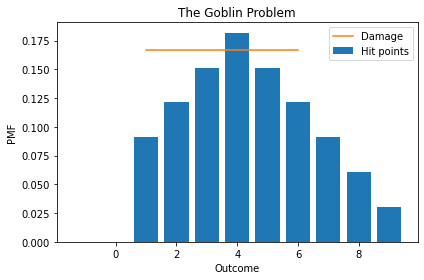

In [85]:
# Solution goes here
# Solution
# Here's what the distributions look like
hp_after.bar(label='Hit points')
damage.plot(label='Damage', color='C1')
decorate_dice('The Goblin Problem')

In [86]:
# Solution goes here
# Solution

# Here's the distribution of points the goblin has left
points_left = Pmf.sub_dist(hp_after, damage)

In [87]:
# Solution goes here
# Solution

# And here's the probability the goblin is dead
points_left.prob_le(0)

0.4545454545454545

**Exercise:** Suppose I have a box with a 6-sided die, an 8-sided die, and a 12-sided die.
I choose one of the dice at random, roll it twice, multiply the outcomes, and report that the product is 12.
What is the probability that I chose the 8-sided die?

Hint: `Pmf` provides a function called `mul_dist` that takes two `Pmf` objects and returns a `Pmf` that represents the distribution of the product.

**练习**:假设我有一个盒子，里面有一个 6 面骰子、一个 8 面骰子和一个 12 面骰子。
我随机选择一个骰子，掷两次，将结果相乘，然后报告结果是 12。
我选择 8 面骰子的概率是多少？

提示：`Pmf` 提供了一个名为 `mul_dist` 的函数，它接受两个 `Pmf` 对象并返回一个代表产品分布的 `Pmf`。

In [88]:
# Solution goes here
# Solution

die = Pmf(1/3, [0,1,2])
die

,probs
0,0.333333
1,0.333333
2,0.333333


In [89]:
# Solution goes here
# Solution

pmfs = {}
pmfs['Bellows'] = add_dist_seq([die]*3)
pmfs['Zostra'] = add_dist_seq([die]*4)
pmfs['Longfellow'] = add_dist_seq([die]*5)

In [90]:
# Solution goes here
# Solution

pmfs['Zostra'](4)

0.2345679012345679

In [91]:
# Solution goes here
# Solution

pmfs['Zostra'](4)

0.2345679012345679

In [92]:
# Click to hide# Solution

hypos = pmfs.keys()
prior = Pmf(1/3, hypos)
prior

,probs
Bellows,0.333333
Zostra,0.333333
Longfellow,0.333333


In [93]:
# Solution

likelihood = prior.copy()

for hypo in hypos:
    likelihood[hypo] = pmfs[hypo]([3,4,5]).prod()

likelihood

,probs
Bellows,0.006401
Zostra,0.009152
Longfellow,0.004798


In [94]:
# Solution

posterior = (prior * likelihood)
posterior.normalize()
posterior

,probs
Bellows,0.314534
Zostra,0.449704
Longfellow,0.235762


**Exercise:** *Betrayal at House on the Hill* is a strategy game in which characters with different attributes explore a haunted house.  Depending on their attributes, the characters roll different numbers of dice.  For example, if attempting a task that depends on knowledge, Professor Longfellow rolls 5 dice, Madame Zostra rolls 4, and Ox Bellows rolls 3.  Each die yields 0, 1, or 2 with equal probability.  

If a randomly chosen character attempts a task three times and rolls a total of 3 on the first attempt, 4 on the second, and 5 on the third, which character do you think it was?

**练习：** *山上之屋的背叛*是一款策略游戏，其中具有不同属性的角色探索鬼屋。根据他们的属性，角色掷出不同数量的骰子。例如，如果尝试一项依赖知识的任务，朗费罗教授掷 5 个骰子，佐斯特拉夫人掷 4 个骰子，牛风箱掷 3 个骰子。每个骰子以相同的概率产生 0、1 或 2。

如果一个随机选择的角色尝试了 3 次任务，并且第一次尝试的总点数为 3，第二次为 4，第三次为 5，你认为是哪个角色？



In [122]:
# Solution

die = Pmf(1/3, [0,1,2])
die

,probs
0,0.333333
1,0.333333
2,0.333333


In [123]:
# Click to hide# Solution

pmfs = {}
pmfs['Bellows'] = add_dist_seq([die]*3)
pmfs['Zostra'] = add_dist_seq([die]*4)
pmfs['Longfellow'] = add_dist_seq([die]*5)

In [124]:
# Click to hide# Solution

pmfs['Zostra'](4)

0.2345679012345679

In [125]:
# Click to hide# Solution

pmfs['Zostra']([3,4,5]).prod()

0.00915247412224499

In [128]:
# Click to hide# Solution

hypos = pmfs.keys()
prior = Pmf(1/3, hypos)
prior

,probs
Bellows,0.333333
Zostra,0.333333
Longfellow,0.333333


In [129]:
# Solution

likelihood = prior.copy()

for hypo in hypos:
    likelihood[hypo] = pmfs[hypo]([3,4,5]).prod()

likelihood

,probs
Bellows,0.006401
Zostra,0.009152
Longfellow,0.004798


In [133]:
# Solution

posterior = (prior * likelihood)
posterior.normalize()
posterior

,probs
Bellows,0.314534
Zostra,0.449704
Longfellow,0.235762


In [134]:
# Solution goes here
# Solution

posterior.max_prob()

'Zostra'

,probs
Bellows,0.314534
Zostra,0.449704
Longfellow,0.235762


**Exercise:** There are 538 members of the United States Congress. Suppose we audit their investment portfolios and find that 312 of them out-perform the market.
Let's assume that an honest member of Congress has only a 50% chance of out-performing the market, but a dishonest member who trades on inside information has a 90% chance.  How many members of Congress are honest?

练习：美国国会有538名议员。假设我们审计了他们的投资组合，发现其中 312 家的表现优于市场。让我们假设一个诚实的国会议员只有 50% 的机会跑赢市场，但一个利用内幕信息进行交易的不诚实议员有 90% 的机会。有多少国会议员是诚实的？

In [ ]:
# Solution goes here
# Solution

# Solution

n = 538

table = pd.DataFrame()

for n_honest in range(0, n+1):
    n_dishonest = n - n_honest

    dist_honest = make_binomial(n_honest, 0.5)
    dist_dishonest = make_binomial(n_dishonest, 0.9)
    dist_total = Pmf.add_dist(dist_honest, dist_dishonest)    
    table[n_honest] = dist_total
    
table.shape

In [106]:
# Solution goes here
# Solution

data = 312
likelihood = table.loc[312]  ### 312家优于市场，取第312行 作为likelihood
len(likelihood)

539

In [107]:
# Solution goes here
# Click to hide# Solution

hypos = np.arange(n+1) ## 计算先验
prior = Pmf(1, hypos)
len(prior)

539

In [109]:
# Solution goes here
# Solution

posterior = prior * likelihood  ### 计算后验
posterior.normalize()
posterior.mean()

431.48821145019957

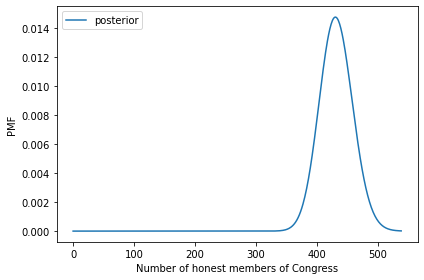

In [110]:
# Solution goes here
# Solution

posterior.plot(label='posterior')
decorate(xlabel='Number of honest members of Congress',
         ylabel='PMF')

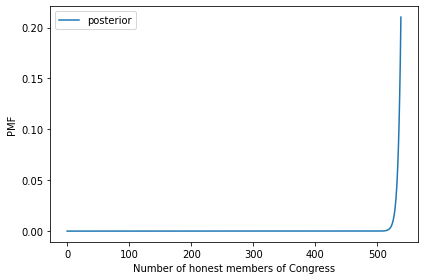

In [120]:

data = 200
likelihood = table.loc[200]  ### 200家由于市场 作为likelihood
len(likelihood)
posterior3 = prior * likelihood  ### 计算后验
posterior3.normalize()
posterior3.mean()
posterior3.plot(label='posterior')
decorate(xlabel='Number of honest members of Congress',
            ylabel='PMF')
### 人人皆诚实，取第200行作为likelihood

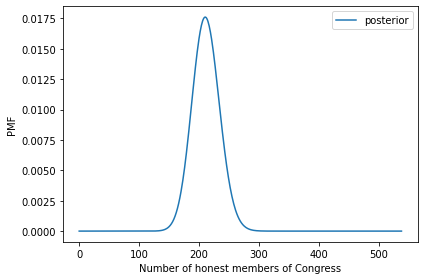

In [121]:


likelihood = table.loc[400]  ### 400家由于市场 作为likelihood
len(likelihood)
posterior3 = prior * likelihood  ### 计算后验
posterior3.normalize()
posterior3.mean()
posterior3.plot(label='posterior')
decorate(xlabel='Number of honest members of Congress',
            ylabel='PMF')
### 200人诚实

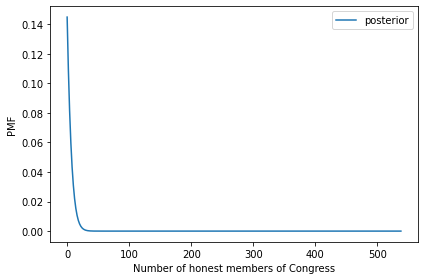

In [118]:

data = 500
likelihood = table.loc[500]  
len(likelihood)
posterior3 = prior * likelihood  ### 计算后验
posterior3.normalize()
posterior3.mean()
posterior3.plot(label='posterior')
decorate(xlabel='Number of honest members of Congress',
            ylabel='PMF')
### 无一人诚实，取第500行作为likelihood

In [111]:
# Solution goes here
# Solution

posterior.max_prob()

430

In [113]:
# Solution goes here
# Solution

posterior.credible_interval(0.9) ### 计算置信区间

array([388., 477.])